### Rozwiązanie

# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


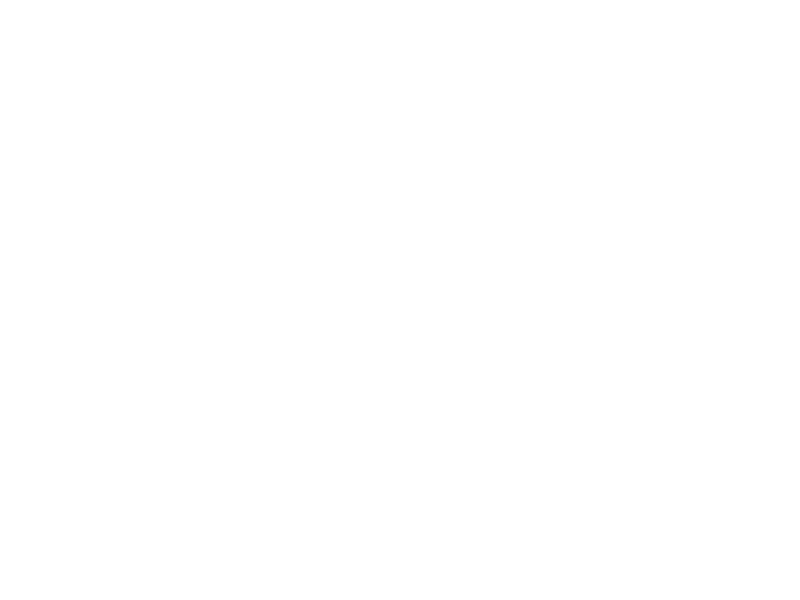

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

In [4]:
%matplotlib notebook

import random
import math


def points_in_range_1000():
    points = []
    for i in range(100000):
        pointX = random.uniform(-1000, 1000)
        pointY = random.uniform(-1000, 1000)
        points.append((pointX, pointY))
    return points


def points_in_range_thousand_trilion():
    points = []
    for i in range(100000):
        pointX = random.uniform(-10 ** 14, 10 ** 14)
        pointY = random.uniform(-10 ** 14, 10 ** 14)
        points.append((pointX, pointY))
    return points


def points_in_circle(radius):
    points = []
    for i in range(1000):
        a = random.uniform(0, radius)
        t = random.uniform(0, 2 * math.pi)
        x = a * math.cos(t)
        y = a * math.sin(t)
        points.append((x, y))
    return points


def points_on_straight():  # y = 0.5x + 0.5
    points = []

    for i in range(1000):
        x = random.uniform(-1000, 1000)
        y = 0.5 * x + 0.5
        points.append((x, y))
    return points


In [5]:
#10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]:
plot = Plot(points=[PointsCollection(points_in_range_1000())])
plot.draw()
    

<IPython.core.display.Javascript object>

In [6]:
Punkty na okręgu:
    

SyntaxError: invalid syntax (<ipython-input-6-959f5f704022>, line 1)

In [ ]:
plot = Plot(points=[PointsCollection(points_in_circle(100))])
plot.draw()